In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from IPython.display import display

In [3]:
cars = pd.read_csv("cars.csv")
cars.columns = cars.columns.str.replace(" ", "")
cars.cubicinches = cars.cubicinches[cars.cubicinches != " "]
cars.weightlbs = cars.weightlbs[cars.weightlbs != " "]
cars = cars.dropna()
display(cars.head())
print(cars.brand.unique())

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


[' US.' ' Europe.' ' Japan.']


In [4]:
X = cars.drop(columns = "brand")
y = cars.brand

In [5]:
cars.cubicinches = pd.to_numeric(cars.cubicinches)
cars.weightlbs = pd.to_numeric(cars.weightlbs)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
dtc = DecisionTreeClassifier(max_depth = 3, criterion = "gini")
dtc.fit(X_train, y_train)
print(dtc.score(X_test, y_test))

0.8076923076923077


* A large portion of car brand samples that have an average cubic inches below 169.5, belong to the U.S or Europe. 
More Specifically, cars that were manufactured before 1982 and were greater than 87 cubic inches belonged to the U.S, 
and the ones above 87 cubic inches were classified as European. 
In general, cars with an average above 169.5 cubic inches were classified under either Japan or U.S. 
More specifically, the overwhelming majority of the sample containing cars above 169.5 cubic inches, 
and have more than 5.5 cylinders were Japanese makes. If we were to make predicitions based on this model, 
It would be more than likely to classify cars below 169.5 cubic inches as either European or American made, 
whereas we would be almost completely certain that a car above 169.5 cubic inches would be a Japanese make.


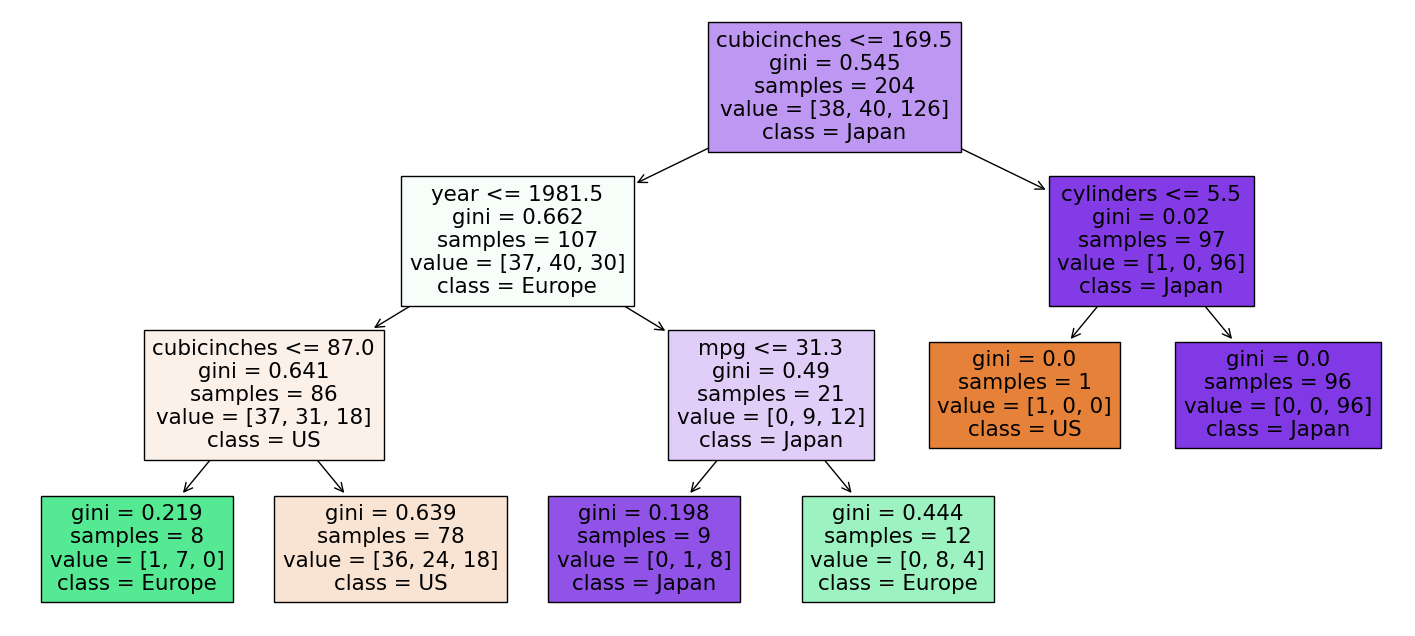

In [19]:
print("* A large portion of car brand samples that have an average cubic inches below 169.5, belong to the U.S or Europe. \nMore Specifically, cars that were manufactured before 1982 and were greater than 87 cubic inches belonged to the U.S, \nand the ones above 87 cubic inches were classified as European. \nIn general, cars with an average above 169.5 cubic inches were classified under either Japan or U.S. \nMore specifically, the overwhelming majority of the sample containing cars above 169.5 cubic inches, \nand have more than 5.5 cylinders were Japanese makes. If we were to make predicitions based on this model, \nIt would be more than likely to classify cars below 169.5 cubic inches as either European or American made, \nwhereas we would be almost completely certain that a car above 169.5 cubic inches would be a Japanese make.")
plt.figure(figsize = (18, 8))
plot_tree(dtc, filled = True, feature_names = X.columns, class_names = ['US', 'Europe', 'Japan'])
plt.show()
